In [7]:
import numpy as np
import matplotlib.pyplot as plt
from preamble import *
import pandas as pd
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
%matplotlib inline
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

#knn 회귀

X, y = mglearn.datasets.make_wave(n_samples=40)
# wave BIOi터셋을 훈 련 셰트왔 B/스트 서/트로 나 눕 LI 타
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=0)
# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit( X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [4]:
print("테스트 세트 예측\n{}".format(reg.predict(X_test)))

테스트 세트 예측
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [5]:
#R^2는 결정계수다. 결정계수는 회귀 모델에서 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표
#R^2 가 1이면 완벽 예측한 것으로, 과적합이 된 것이다. 0이되면 모든 예측을 평균값으로만 한게 된 것이다.
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


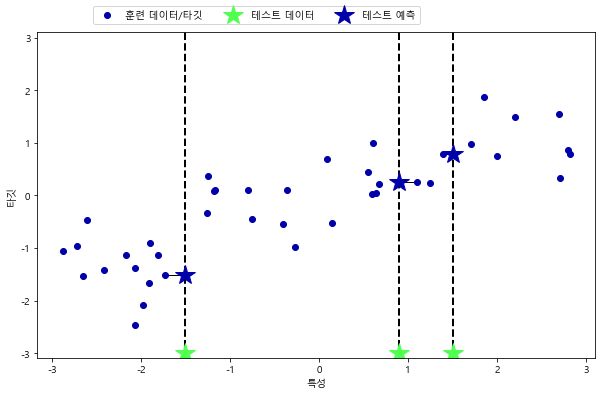

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

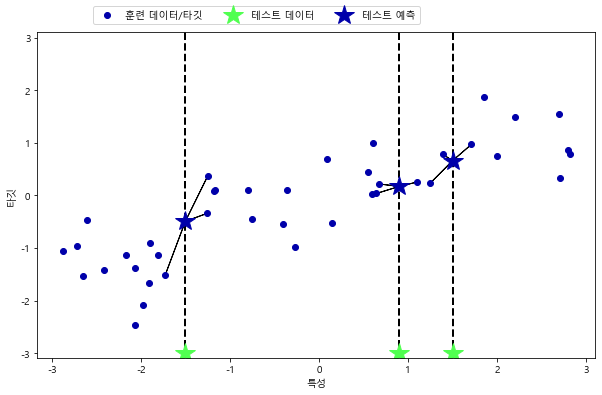

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.(이번에는 testset을 40퍼센트로)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

#이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [11]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.054  0.43   0.826 -1.894 -1.042 -1.631  0.169  0.912 -0.446 -1.042
 -0.493  0.826 -1.042  0.413 -0.446  0.43 ]


In [12]:
#앞에서 보다 훨씬 떨어졌음을 알 수 있다.
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.68


X_train.shape: (24, 1) X_test.shape:(16, 1)
X_train.shape: (24, 1) X_test.shape:(16, 1)
X_train.shape: (24, 1) X_test.shape:(16, 1)


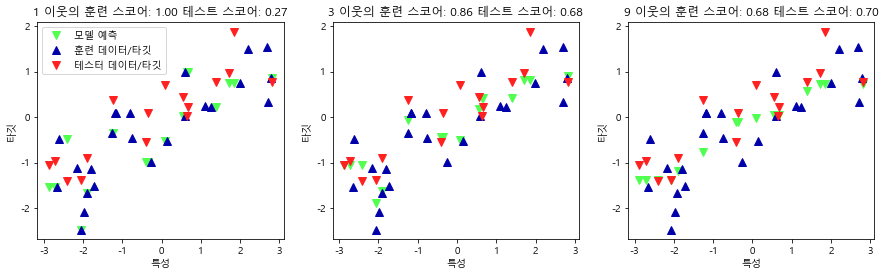

In [17]:
#figsize는 차트의 기본 크기
#1개의 figure 객체, 3개의 subplot 리턴
fix, axes = plt.subplots(1,3, figsize=(15,4))
for n_neighbors, ax in zip([1,3 ,9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
    reg.fit(X_train, y_train)
    #'v'를 인자로 주면 마커를 역삼각형, '^"를 주면, 삼각형을 사용한다.
    # c는 color
    ax.plot(X_test, reg.predict(X_test), 'v', c=mglearn.cm3(2), markersize=8)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스터 데이터/타깃"], loc="best")


In [18]:
# 선형회귀모델

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [19]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [20]:

#Boston 주택 가격
from sklearn.datasets import load_boston
boston = load_boston()

print("boston.keys(): {}\n".format(boston.keys()))
print("Data의 크기: {}\n".format(boston['data'].shape))
print("특성 이름:\n{}\n".format(boston.feature_names))
print(boston['DESCR'] + "\n...")

df = pd.DataFrame(boston.data, columns = boston.feature_names)
print(df.head())

boston.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Data의 크기: (506, 13)

특성 이름:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS 

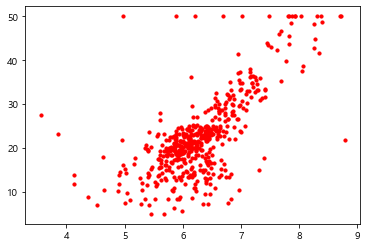

In [21]:
#방의 갯수에 따른 주택 가격
import matplotlib.pyplot as plt
plt.scatter(boston.data[:, 5], boston.target, color='r', s=10)

In [25]:
# 속성 하나로 선형회귀 실험
X = boston.data[:, 5]

print(X.shape)

# LineaerRegression의 함수에 인자로 전달하기 위해서는
# 각 원소의 값이 담긴 2차원 배열을 (n,1)의 형태로 만들어야 함
# atleast_2d 함수는 x 데이터를 2차원 배열을 (1, n) 형태로 만들어준다.

X_1 = np.atleast_2d(X)
print(X_1.shape)
X_2 = np.transpose(X_1)
print(X_2.shape)
y = boston.target

lr.fit(X_2, y)

y_predicted = lr.predict(X_2)

print("w[0]: %f b: %f" % (lr.coef_[0], lr.intercept_))


(506,)
(1, 506)
(506, 1)
w[0]: 9.102109 b: -34.670621


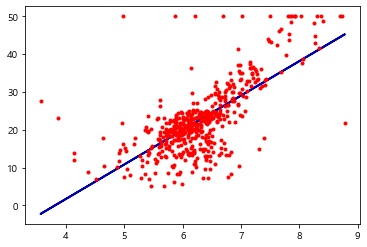

In [26]:
plt.plot(X_2, y_predicted)
plt.plot(X_2, y, 'o', color='r', markersize=3)

In [27]:
X, y = mglearn.datasets.load_extended_boston()

print("X.shape: {}".format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)


X.shape: (506, 104)
X_train.shape: (379, 104) X_test.shape:(127, 104)


In [28]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
#테스트 점수가 훈련 세트 점수에 비해 많이 떨어지는 것을 보아 과적합되었음을 알 수 있다.
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수: 0.61


In [33]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


In [38]:
#릿지 회귀(Ridge Regression)

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))
#테스트 점수로 비교했을 때, 릿지 회귀가 성능이 더 좋은 것을 알 수 있다.



knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))


훈련 세트 점수: 0.89
테스트 세트 점수: 0.75
훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


In [40]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge5 = Ridge(alpha=5).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge5.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge5.score(X_test, y_test)))

ridge05 = Ridge(alpha=0.5).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge05.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge05.score(X_test, y_test)))

ridge03 = Ridge(alpha=0.3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge03.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge03.score(X_test, y_test)))

ridge02 = Ridge(alpha=0.2).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge02.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge02.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge001.score(X_test, y_test)))

ridge100 = Ridge(alpha=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge100.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge100.score(X_test, y_test)))

#알파 값이 너무 크면, 과소 적합이 되고, 너무 작으면 과대 적합이 됨을 알 수 있다.



훈련 세트 점수: 0.79
테스트 세트 점수: 0.64
훈련 세트 점수: 0.82
테스트 세트 점수: 0.68
훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
훈련 세트 점수: 0.91
테스트 세트 점수: 0.77
훈련 세트 점수: 0.92
테스트 세트 점수: 0.77
훈련 세트 점수: 0.93
테스트 세트 점수: 0.77
훈련 세트 점수: 0.94
테스트 세트 점수: 0.70
훈련 세트 점수: 0.60
테스트 세트 점수: 0.42


In [42]:
#라쏘(lasso) 회귀(Regression)
from sklearn.linear_model import Lasso
#alpha =1, 낮은 성능, 적은 특성 사용, 과소적합
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {:2f}".format(np.sum(lasso.coef_ !=0)))



훈련 세트 점수: 0.293238
테스트 세트 점수: 0.209375
사용한 특성의 개수: 4.000000


In [47]:
#alpha = 0.01 패널티 효과 감소, 복잡도 증가

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {:2f}".format(np.sum(lasso001.coef_ !=0)))

훈련 세트 점수: 0.896223
테스트 세트 점수: 0.765657
사용한 특성의 개수: 33.000000


In [46]:
#alpha를 너무 작게하면, 선형 모델과 유사
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {:2f}".format(np.sum(lasso00001.coef_ !=0)))

훈련 세트 점수: 0.950716
테스트 세트 점수: 0.643747
사용한 특성의 개수: 96.000000


Text(0, 0.5, '계수 크기')

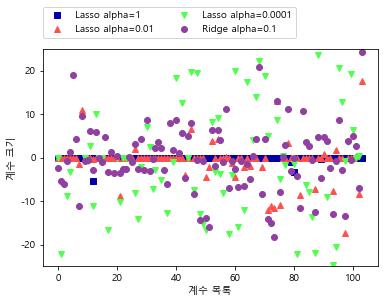

In [51]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
# y 축 범위 설정
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름: {}".format(iris['target_names']))
print('특성의 이름: {}'.format(iris['feature_names']))
X = iris['data'][:,3:] #petal width
print(X.shape)
y = (iris["target"]==2).astype(np.int) #'virginica'면 1 아니면 0
print(y.shape)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


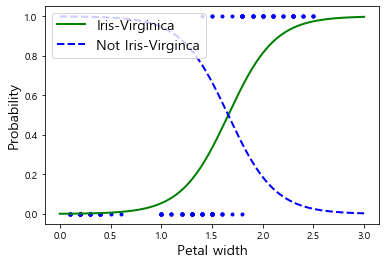

array([1, 0, 0, 1])

In [58]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

# 꽃잎의 너비가 0-3cm인 꽃에 대해 모델의 추정 확률

X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y ,"b.")
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

#log_reg = LogisticRegression(solver='liblinear', penalty="l1")

#교차점을 중심으로, 1과 0으로 구분된다
log_reg.predict([[1.7], [1.5], [1.3], [2.0]])


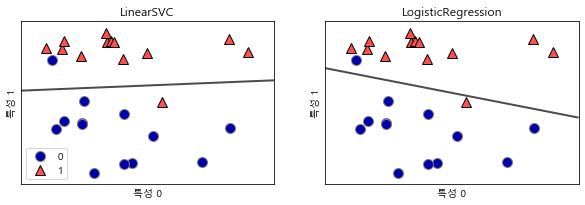

In [62]:
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model , ax in zip([LinearSVC(max_iter=100000), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
    

    

In [63]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#C 는 Inverse Of regularization strength로 기본 값은 1이다. (1/c) *  패널티 
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))


훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [64]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
# 1/100: 패널티가 작아진다. 규제 완화, 훈련세트에 맞추려함, 개개의 포인터에 맞추려함
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [65]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
#규제강화, 패널티가 커진다. 계수를 0에 가깝게, 다수의 포인터에 맞추려함
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
사용한 특성의 개수: 3
사용한 특성:[[ 0.     0.     0.057  0.005  0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.    -0.01   0.     0.     0.     0.     0.     0.   ]]
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
사용한 특성의 개수: 10
사용한 특성:[[ 3.689  0.081 -0.162 -0.012  0.     0.     0.     0.     0.     0.
   0.     1.43   0.    -0.093  0.     0.     0.     0.     0.     0.
   0.    -0.329 -0.055 -0.017  0.     0.    -3.698  0.     0.     0.   ]]
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98
사용한 특성의 개수: 23
사용한 특성:[[  0.857  -0.193   0.111  -0.005 -12.279  65.936  -4.984 -87.129   0.
    0.     -1.201   0.725   0.98   -0.245   0.      0.     36.339   0.
   34.719   0.      0.365  -0.304   0.036  -0.023 -50.594   0.353 -10.626
  -45.03  -19.578   0.   ]]


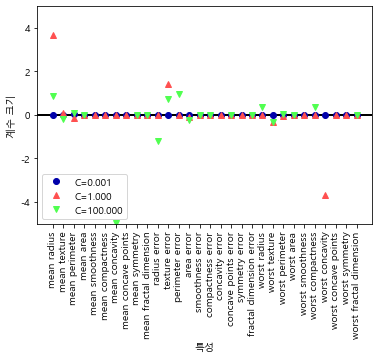

In [69]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    print("사용한 특성의 개수: {}".format(np.sum(lr_l1.coef_ !=0)))
    print("사용한 특성:{}".format(lr_l1.coef_))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

C=0.001 인 l2 로지스틱 회귀의 훈련 정확도: 0.92
C=0.001 인 l2 로지스틱 회귀의 테스트 정확도: 0.94
사용한 특성의 개수: 30
사용한 특성:[[ 0.025 -0.007  0.099  0.014 -0.    -0.001 -0.002 -0.001 -0.     0.
   0.     0.001 -0.004 -0.027 -0.    -0.    -0.001 -0.    -0.    -0.
   0.025 -0.03   0.055 -0.028 -0.    -0.005 -0.007 -0.002 -0.001 -0.   ]]
C=1.000 인 l2 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l2 로지스틱 회귀의 테스트 정확도: 0.96
사용한 특성의 개수: 30
사용한 특성:[[ 1.909  0.1   -0.077  0.001 -0.137 -0.387 -0.572 -0.283 -0.224 -0.035
   0.003  1.252  0.095 -0.096 -0.013 -0.024 -0.059 -0.034 -0.041  0.002
   1.247 -0.32  -0.096 -0.027 -0.244 -1.244 -1.583 -0.578 -0.68  -0.131]]
C=100.000 인 l2 로지스틱 회귀의 훈련 정확도: 0.97
C=100.000 인 l2 로지스틱 회귀의 테스트 정확도: 0.97
사용한 특성의 개수: 30
사용한 특성:[[ 4.804  0.173 -0.427 -0.014 -1.838 -0.503 -1.832 -2.851 -2.633  0.078
   0.046  2.965 -0.572 -0.095 -0.234  2.218  3.075 -0.163  0.189  0.371
  -0.111 -0.516  0.115 -0.021 -3.368 -1.834 -2.604 -5.866 -5.319 -0.082]]


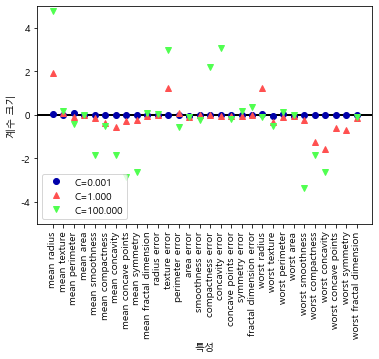

In [70]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l2", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l2 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l2 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    print("사용한 특성의 개수: {}".format(np.sum(lr_l1.coef_ !=0)))
    print("사용한 특성:{}".format(lr_l1.coef_))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

# mean parameter는 양 클래스 모두에 관련하고 있다는 것을 알 수있다.